# KNN

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('white_wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [3]:
import seaborn as sns

In [4]:
data ['label'] = np.where(data['quality'] > 6, 1, 0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0


In [5]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='density', ylabel='alcohol'>

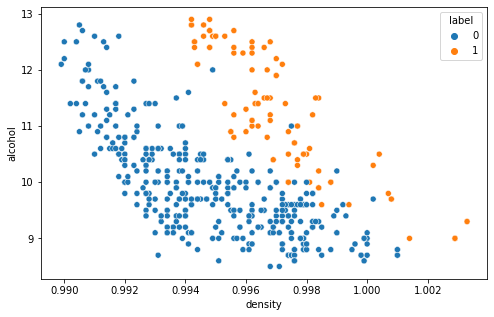

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'density', y = 'alcohol', data = data, hue = 'label')

In [7]:
# Missing Value
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
label                   0
dtype: int64

In [8]:
data['alcohol'].fillna(data['alcohol'].mean(), inplace = True)

In [9]:
data['alcohol'].isnull().sum()

0

In [10]:
X = data[['alcohol', 'density']]
Y = data['label']

In [11]:
# Train Test Split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
X_train, X_test, Y_train, Y_test =train_test_split(
    X,
    Y,
    stratify = Y,
    test_size = 0.2,
    random_state = 2020
)

# KNN Model Without Scaling

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_predict_class = knn.predict(X_test)
y_predict_class

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
print(confusion_matrix(Y_test, y_predict_class))
print(classification_report(Y_test, y_predict_class))

[[79  5]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        84
           1       0.75      0.75      0.75        20

    accuracy                           0.90       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.90      0.90      0.90       104



In [18]:
print ('Akurasi Model Adalah : ', round(accuracy_score(Y_test, y_predict_class)*100,2))

Akurasi Model Adalah :  90.38


# KNN Model With Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled[:10]

array([[0.45454545, 0.34586466],
       [0.11363636, 0.36842105],
       [0.11363636, 0.96992481],
       [0.13636364, 0.46616541],
       [0.43181818, 0.34586466],
       [0.15909091, 0.63909774],
       [0.56818182, 0.12781955],
       [0.34090909, 0.45112782],
       [0.09090909, 0.46616541],
       [0.52272727, 0.15037594]])

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y_predict_class_transform = knn.predict(X_test_scaled)

In [24]:
print(confusion_matrix(Y_test, y_predict_class_transform))
print(classification_report(Y_test, y_predict_class_transform))
print ('Akurasi Model Adalah : ', round(accuracy_score(Y_test, y_predict_class_transform)*100,2))

[[83  1]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104

Akurasi Model Adalah :  98.08


# Choose Factor K

In [25]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []

In [26]:
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled,Y_train)

  y_predict_train = knn.predict(X_train_scaled)
  training_accuracies.append(accuracy_score(Y_train,y_predict_train))

  y_predict_test = knn.predict(X_test_scaled)
  acc_score = accuracy_score(Y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

In [27]:
print ('best k : ', best_k)
print ('Akurasi : ', round(score*100,2))

best k :  17
Akurasi :  99.04


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:

([<matplotlib.axis.XTick at 0x22ede96bbe0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

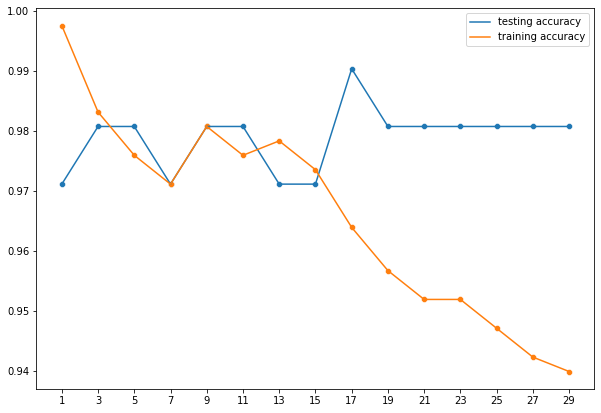

In [28]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))

# DT Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    al

In [31]:
tree = DecisionTreeClassifier( max_depth = 3 )
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
pred = tree.predict(X_test)
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [33]:
print(confusion_matrix(Y_test, pred))

[[84  0]
 [ 5 15]]


In [34]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        84
           1       1.00      0.75      0.86        20

    accuracy                           0.95       104
   macro avg       0.97      0.88      0.91       104
weighted avg       0.95      0.95      0.95       104



In [35]:
from sklearn.tree import plot_tree

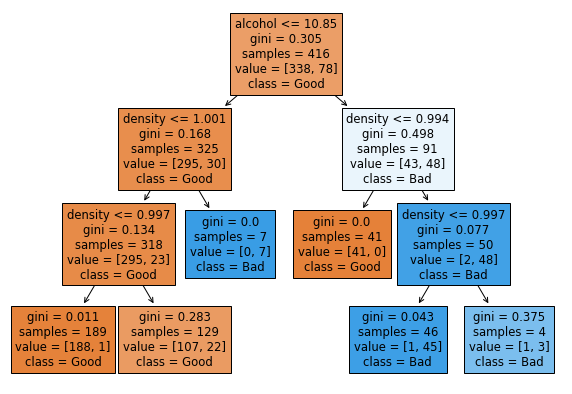

In [36]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names = list(X), class_names = ['Good', 'Bad'], filled= True)
plt.show()

In [37]:
X_test.iloc[5]

alcohol    11.0000
density     0.9924
Name: 187, dtype: float64

In [38]:
newpred = tree.predict([X_test.iloc[5]])
newpred

array([0])

In [39]:
proba = tree.predict_proba([X_test.iloc[0]])
proba

array([[0.02173913, 0.97826087]])